In [46]:
import gym
from ddqn import DDQN
import torch
import variable as v
from train_session import TrainSession
from copy import deepcopy
import numpy as np
import utils
import matplotlib.pyplot as plt
from PIL import Image

In [52]:
env = gym.make("LunarLander-v2")
train_session = None

In [53]:
env.reset()

action_shape = env.action_space.n
state_shape = env.observation_space.shape[0]
input_as_image = False
load_agent = False
seed = 54

In [54]:
q_network_init = {'l1_shape': state_shape, 'l2_shape': 64, 
                  'l3_shape': 64, 'o_shape': action_shape}

replay_buffer_init = {'max_len': 10000, 'batch_size': 64}

exploration_rate = {'rate': 1.0, 'max_rate': 1.0, 'min_rate': 1e-4, 
                    'decay_rate': 1e-4, 'is_constant': False}

ddqn_init = {
    'seed': seed,
    'num_action': action_shape,
    'discount_factor': .99,
    'update_target_rate': .995,
    'update_after': 256,
    'update_every': 128,
    'hard_update_target_every': np.inf,
    'policy_type': 'e-greedy',
    'temperature': .75,
    'input_image': input_as_image,
    'num_action': action_shape,
    'q_network': {'network_init': q_network_init, 'optimizer': {'lr': 0.001}, 'input_image': input_as_image},
    'buffer': replay_buffer_init,
    'exploration_rate': exploration_rate
}


In [55]:
if not train_session:
    print('Train Session reset')
    train_session = TrainSession({}, env, seed)

Train Session reset


In [56]:
if True:
    agents_created = {
        'DDQN_agent': DDQN(ddqn_init)
    }
    agent_names = train_session.append_agents(agents_created)
    if load_agent:
        train_session.load_model('DDQN_agent', suffix="10000_ep")
else:
    d = {('temperature', ): [.1, .75, 1.5]}
    agent_names = train_session.parameter_grid_append(DDQN, ddqn_init, d)
    

In [57]:
all_agent_names = train_session.agents.keys()
s = '\n- '.join(all_agent_names)
print(f"All Agent(s): \n- {s}")

All Agent(s): 
- DDQN_agent


In [88]:
n_episode = 500
t_max_per_episode = np.inf
graphical = False

In [89]:
train_session.train(n_episode=n_episode, t_max_per_episode=t_max_per_episode,
                    graphical=graphical, agent_subset=agent_names)

100%|██████████| 500/500 [02:32<00:00,  3.29it/s]


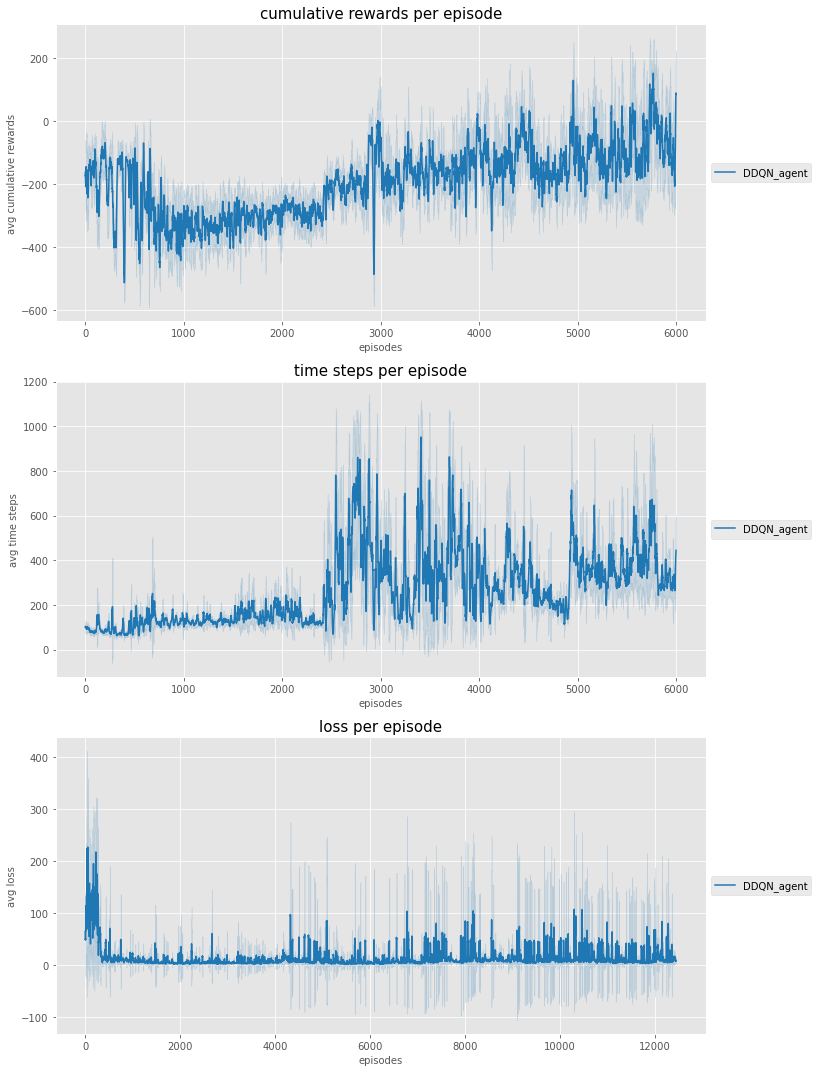

In [90]:
train_session.plot_train(window=10, agent_subset=agent_names)

100%|██████████| 100/100 [00:31<00:00,  3.15it/s]


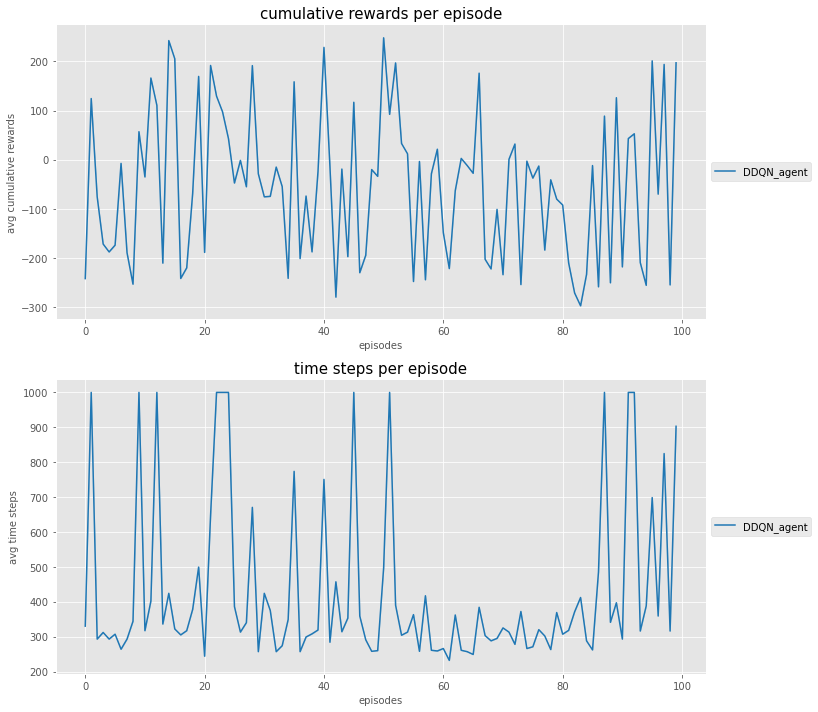

In [94]:
train_session.test(n_episode=100, t_max_per_episode=t_max_per_episode, 
                   graphical=False, agent_subset=None, plot=True,
                   window=1, save_video=False)

In [80]:
train_session.agents["DDQN_agent"].epsilon()

0.0001